In [1]:
CHAR_DEF = [
    'BLANK', '>', ',', '?', '.',
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 
    'H', 'I', 'J', 'K', 'L', 'M', 'N', 
    'O', 'P', 'Q', 'R', 'S', 'T', 'U', 
    'V', 'W', 'X', 'Y', 'Z']
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
import re
import time
import pickle
import redis
import argparse
import json
from pathlib import Path

session = 't17.2024.06.04'
dataDir = str(Path('../Data', 't17', session, 'Typing'))

blocks = [10]
print(dataDir)
all_block_mats = []
for b in blocks:
    filename = [str(x) for x in Path(dataDir, 'RedisMat').glob('*('+str(b)+').mat')][0]
    mat = scipy.io.loadmat(filename)
    all_block_mats.append(mat)
print(all_block_mats)

import tensorflow as tf

all_trial_times = []
trial_decodes = []
current_logits = []
all_trial_logits = []
logit_index = 0
redis_clock = []
current_redis_clock = []
cue = []
for b in all_block_mats:
    logit_index = 0
    for trial, (start_time, end_time) in enumerate(zip(b['go_cue_redis_time'][0], b['trial_end_redis_time'][0])):
        all_trial_times.append((end_time-start_time)/(1000*60))
        current_trial = []
        current_logits = []
        current_redis_clock = []
        cue.append(b['cue'][trial].strip())
        while b['decoder_output_redis_clock'][0][logit_index] < end_time:
            if b['decoder_output_redis_clock'][0][logit_index] < start_time:
                logit_index += 1
                continue
            l = b['decoder_logit_output'][logit_index, :31]
            if np.any(l):
                current_logits.append(l)
            current_redis_clock.append(b['decoder_output_redis_clock'][0][logit_index] - start_time)
            logit_index += 1
        all_trial_logits.append(np.array(current_logits))
        redis_clock.append(current_redis_clock)
        current_logits = np.expand_dims(np.array(current_logits), axis=1)
        seq_len = np.expand_dims(current_logits.shape[0], axis=0)
        nTimeSteps = tf.cast((seq_len - 14) / 4 + 1, dtype=tf.int32)
        decoded_sequence, _ = tf.nn.ctc_greedy_decoder(current_logits, seq_len, merge_repeated=True, blank_index=0)
        trial_decodes.append(decoded_sequence[0])

../Data/t17/t17.2024.06.04/Typing
[{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Jun  4 18:17:04 2024', '__version__': '1.0', '__globals__': [], 'participant': array(['t17'], dtype='<U3'), 'session_name': array(['t17.2024.06.04'], dtype='<U14'), 'session_description': array(['This session is for personal-use unprompted brain-to-text typing decoding.'],
      dtype='<U74'), 'block_number': array([[10]]), 'block_description': array(['Runs a personal use brianToText block then runs the parameterUpdater script to get thresholds and lrr weights.'],
      dtype='<U110'), 'block_start_time': array([[1717537753]], dtype=uint64), 'graph_name': array(['BrainToText_PersonalUse.yaml'], dtype='<U28'), 'binned_neural_threshold_crossings': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16), 'binned_neural_spike_b

2025-04-07 11:52:14.922119: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-07 11:52:14.943992: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-07 11:52:14.944009: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-07 11:52:14.944031: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-07 11:52:14.948709: I tensorflow/core/platform/cpu_feature_g

[(3.927, 'I'), (4.039, '>'), (4.481, 'T'), (5.142, 'O'), (5.143, 'O'), (5.52, 'O'), (5.598, 'O'), (5.599, 'O'), (6.318, 'K'), (6.718, '>'), (7.849, 'G'), (10.185, 'A'), (10.642, '>'), (13.237, 'B'), (14.16, 'I'), (14.722, 'O'), (14.799, 'O'), (16.558, 'T'), (17.28, 'E'), (17.922, 'V'), (18.722, 'C'), (20.421, 'H'), (21.758, 'N'), (22.478, 'O'), (22.481, 'O'), (23.841, 'L'), (24.558, 'O'), (24.561, 'O'), (24.639, 'O'), (25.45, 'G'), (26.242, 'Y'), (27.919, '>'), (29.919, 'C'), (31.12, 'L'), (31.839, 'A'), (32.568, 'D'), (33.839, '>'), (35.742, 'F'), (36.401, 'O'), (36.525, 'O'), (36.527, 'O'), (36.96, 'R'), (37.837, '>'), (38.821, 'T'), (39.28, 'O'), (39.359, 'O'), (39.852, 'O'), (39.919, 'O'), (40.641, '>'), (41.649, 'Y'), (42.079, 'E'), (42.96, 'A'), (43.681, 'R'), (44.4, 'S'), (45.28, '.')]
10
19
35
45


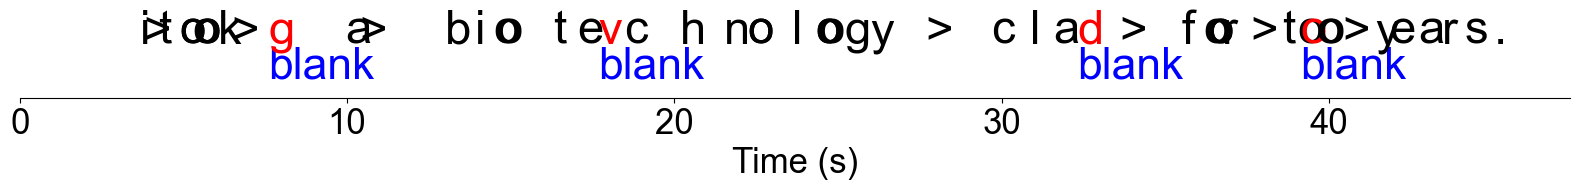

In [2]:
trial_num = -1
logits = all_trial_logits[trial_num]
prev_letter  = -1
all_kept_logits = []
res = []
for i in range(logits.shape[0]):
    if np.argmax(logits[i]) != 0 and np.max(logits[i]) > 0 and (np.argmax(logits[i]) != prev_letter or CHAR_DEF[prev_letter] == 'O'):
        next_logit = np.argsort(logits[i], axis=0)[-2]
        res.append((redis_clock[trial_num][i]/(1000), CHAR_DEF[np.argmax(logits[i])]))
        prev_letter = np.argmax(logits[i])
        all_kept_logits.append(logits[i])
plt.rcParams["figure.figsize"] = (30,1)
plt.rcParams["font.family"] = "Arial"
print(res)
error_indices = [10,19,35,45]
plt.subplots(figsize=(6, 2))
ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(20, 0.5)
y = [1] * len(res)
for idx, (r,y_axis) in enumerate(zip(res,y)):
    if idx in error_indices:
        c = 'r'
        print(idx)
        next_logit = np.argsort(all_kept_logits[idx], axis=0)[-2]
        ax.text(r[0]-0.25, 1.0,CHAR_DEF[next_logit].lower(),fontsize=32, color = 'b')
    else:
        c = 'k'
    symbol =  r[1].lower()

    ax.plot(r[0], 1.0,marker=r"${%s}$" % symbol,lw=0, color='w',markersize=0)
    ax.text(r[0]-0.25, 1.1,symbol,fontsize=34, color = c)#,transform=ax.transAxes)

ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(np.arange(0, 50, 10)) 
plt.xticks(fontsize=25)
plt.xlabel('Time (s)', fontsize=25)
plt.savefig('T17ExampleSentence-biotechnology.pdf', bbox_inches='tight')